<a href="https://colab.research.google.com/github/salllwaaa/Arabic_Stemmer/blob/main/game_prediction_MS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

In [184]:
data=pd.read_csv("/content/games-classification-dataset_ML2.csv")
data.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Rate
0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",6/3/2018,31/07/2019,Intermediate
1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,NaN,"""This interactive experience is an exploration...",Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",21/03/2013,28/06/2017,Intermediate
2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,NaN,Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",4/4/2013,21/04/2015,High
3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,NaN,** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",26/05/2011,23/07/2019,Intermediate
4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,NaN,Fight or sneak your way through hordes of mons...,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",19/05/2017,6/2/2019,High


In [185]:
X=data.drop('Rate',axis=1)
y=data['Rate']

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=2)

In [187]:
train_data=pd.concat([X_train,y_train],axis='columns')
test_data=pd.concat([X_test,y_test],axis='columns')


In [188]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4171 entries, 253 to 2575
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           4171 non-null   object 
 1   ID                            4171 non-null   int64  
 2   Name                          4171 non-null   object 
 3   Subtitle                      1167 non-null   object 
 4   Icon URL                      4171 non-null   object 
 5   User Rating Count             4171 non-null   int64  
 6   Price                         4171 non-null   float64
 7   In-app Purchases              2535 non-null   object 
 8   Description                   4171 non-null   object 
 9   Developer                     4171 non-null   object 
 10  Age Rating                    4171 non-null   object 
 11  Languages                     4161 non-null   object 
 12  Size                          4171 non-null   int64  
 13  P

In [189]:
train_data.shape

(4171, 18)

In [190]:
train_data.describe()

,ID,User Rating Count,Price,Size
count,4.171000e+03,4.171000e+03,4171.000000,4.171000e+03
mean,8.661515e+08,4.145890e+03,0.602407,1.381858e+08
std,2.945126e+08,5.543394e+04,2.730678,2.554433e+08
min,2.849214e+08,5.000000e+00,0.000000,2.158400e+05
25%,5.952646e+08,1.300000e+01,0.000000,2.761677e+07
50%,9.177783e+08,5.000000e+01,0.000000,6.700851e+07
75%,1.112485e+09,3.380000e+02,0.000000,1.591173e+08
max,1.341837e+09,3.032734e+06,139.990000,4.005591e+09


In [191]:
train_data.isnull().sum().sort_values(ascending=False)

Subtitle                        3004
In-app Purchases                1636
Languages                         10
URL                                0
Age Rating                         0
Current Version Release Date       0
Original Release Date              0
Genres                             0
Primary Genre                      0
Size                               0
Developer                          0
ID                                 0
Description                        0
Price                              0
User Rating Count                  0
Icon URL                           0
Name                               0
Rate                               0
dtype: int64

In [192]:
train_data.drop(['Subtitle','In-app Purchases'],axis=1,inplace=True)

In [193]:
train_data['Languages'].fillna(train_data['Languages'].mode()[0], inplace=True)

In [194]:
train_data.duplicated().sum()
#remove them

25

In [195]:
train_data.drop_duplicates(inplace=True)

**EDA**

<Axes: xlabel='Rate', ylabel='count'>

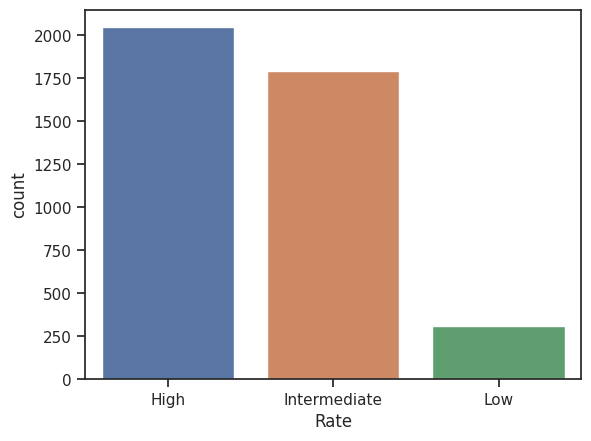

In [196]:
sns.countplot(x=train_data['Rate'])

<Axes: xlabel='Age Rating', ylabel='count'>

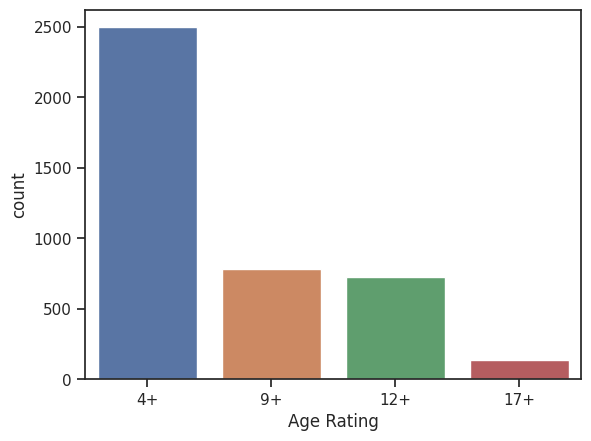

In [197]:
sns.countplot(x=train_data['Age Rating'])

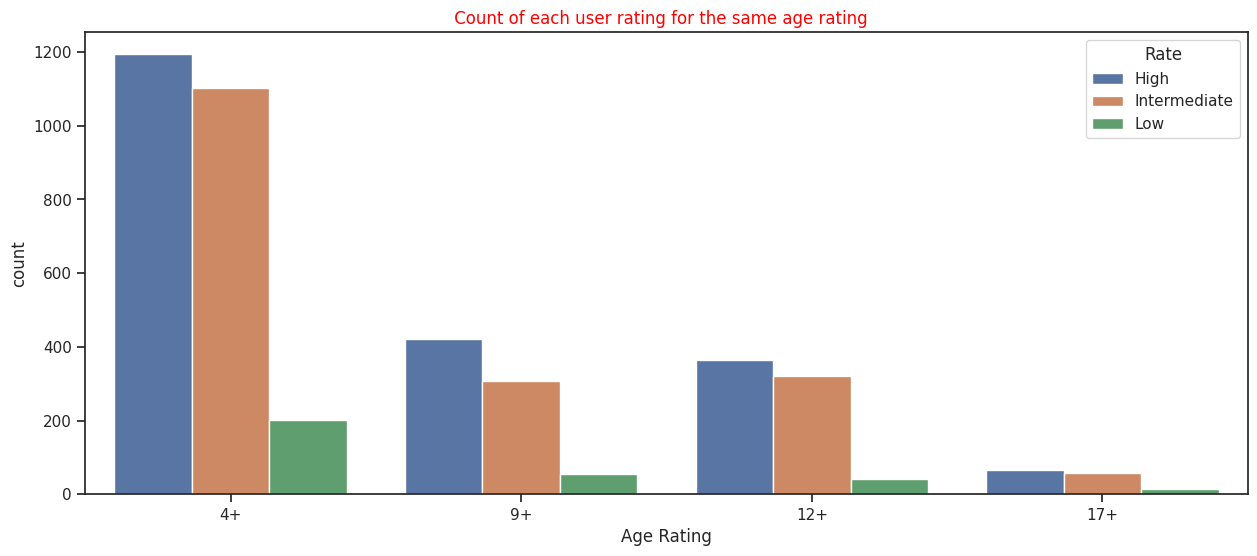

In [198]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x ='Age Rating',hue='Rate', data = train_data)
plt.title(" Count of each user rating for the same age rating   ",color="red");

<ipython-input-199-8cdee6a9581f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Size'])


<Axes: xlabel='Size', ylabel='Density'>

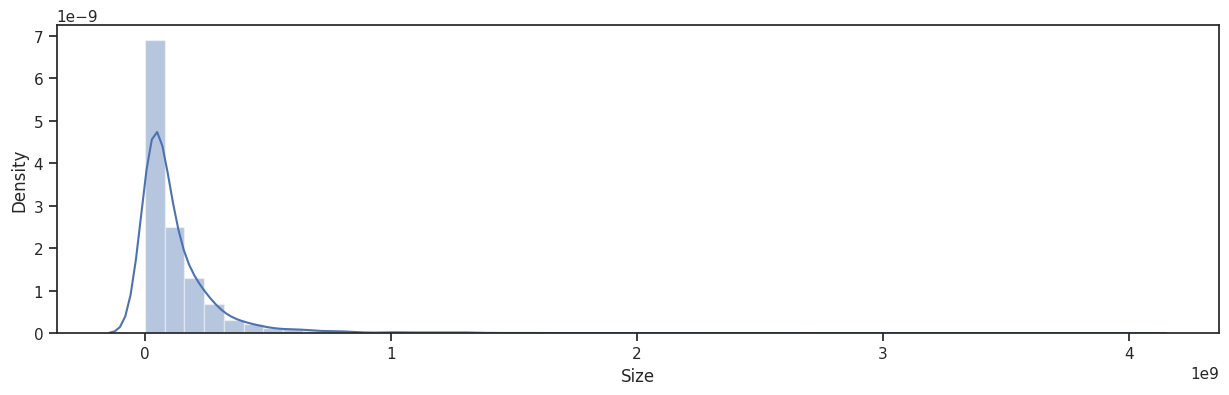

In [199]:
plt.figure(figsize=(15,4))
sns.distplot(train_data['Size'])

In [200]:
Q1 = train_data['Size'].quantile(0.25)
Q3 = train_data['Size'].quantile(0.75)

x1=train_data[train_data['Size']<Q1]
x2=train_data[(train_data['Size']>Q1) & (train_data['Size']<Q3)]
x3=train_data[train_data['Size']>Q3]


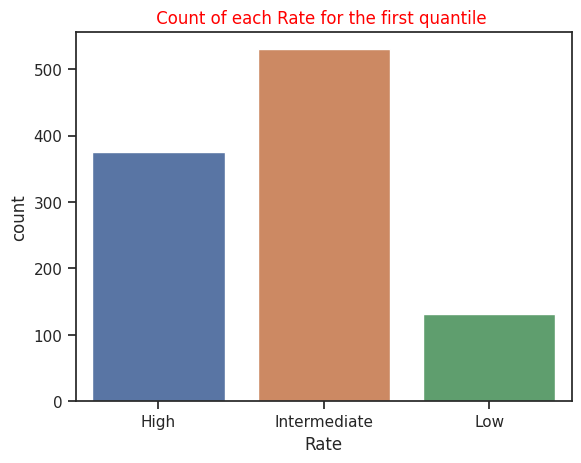

In [201]:
sns.countplot(x=x1['Rate'])
plt.title(" Count of each Rate for the first quantile  ",color="red");

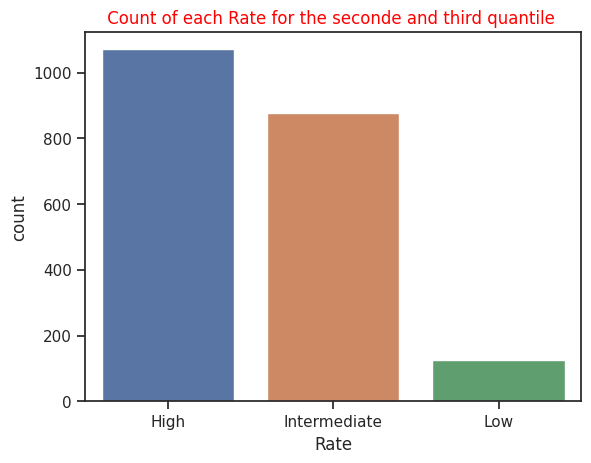

In [202]:
sns.countplot(x=x2['Rate'])
plt.title(" Count of each Rate for the seconde and third quantile  ",color="red");

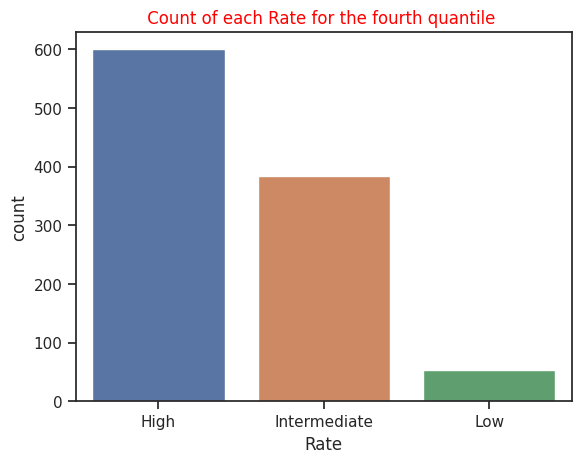

In [203]:
sns.countplot(x=x3['Rate'])
plt.title(" Count of each Rate for the fourth quantile  ",color="red");

<ipython-input-204-b6638e40aca5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

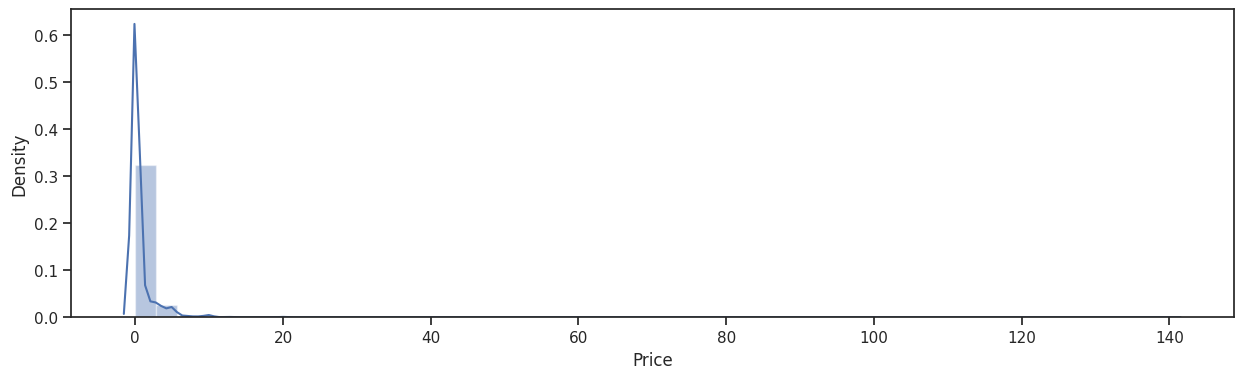

In [204]:
plt.figure(figsize=(15,4))
sns.distplot(train_data['Price'])

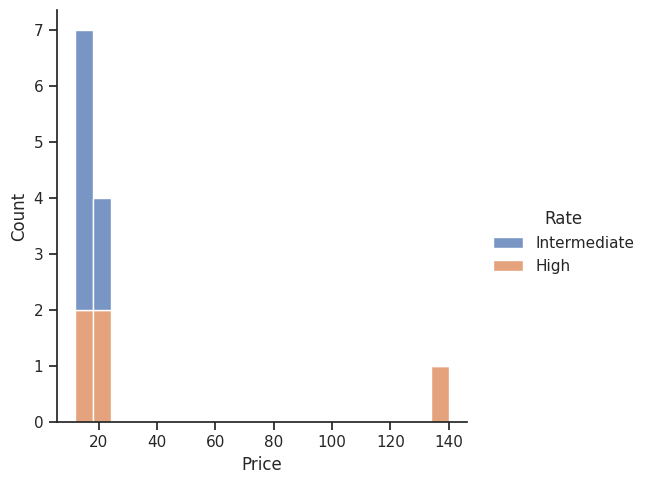

In [205]:
u=train_data[train_data['Price']>10]
sns.displot(data=u, x="Price", hue="Rate", multiple="stack")

In [206]:
len(u)

12

If price increasing does it affect to Average user rating>>>>conclusion inc price inc Average directly porpointal

low no of row doesn't affect

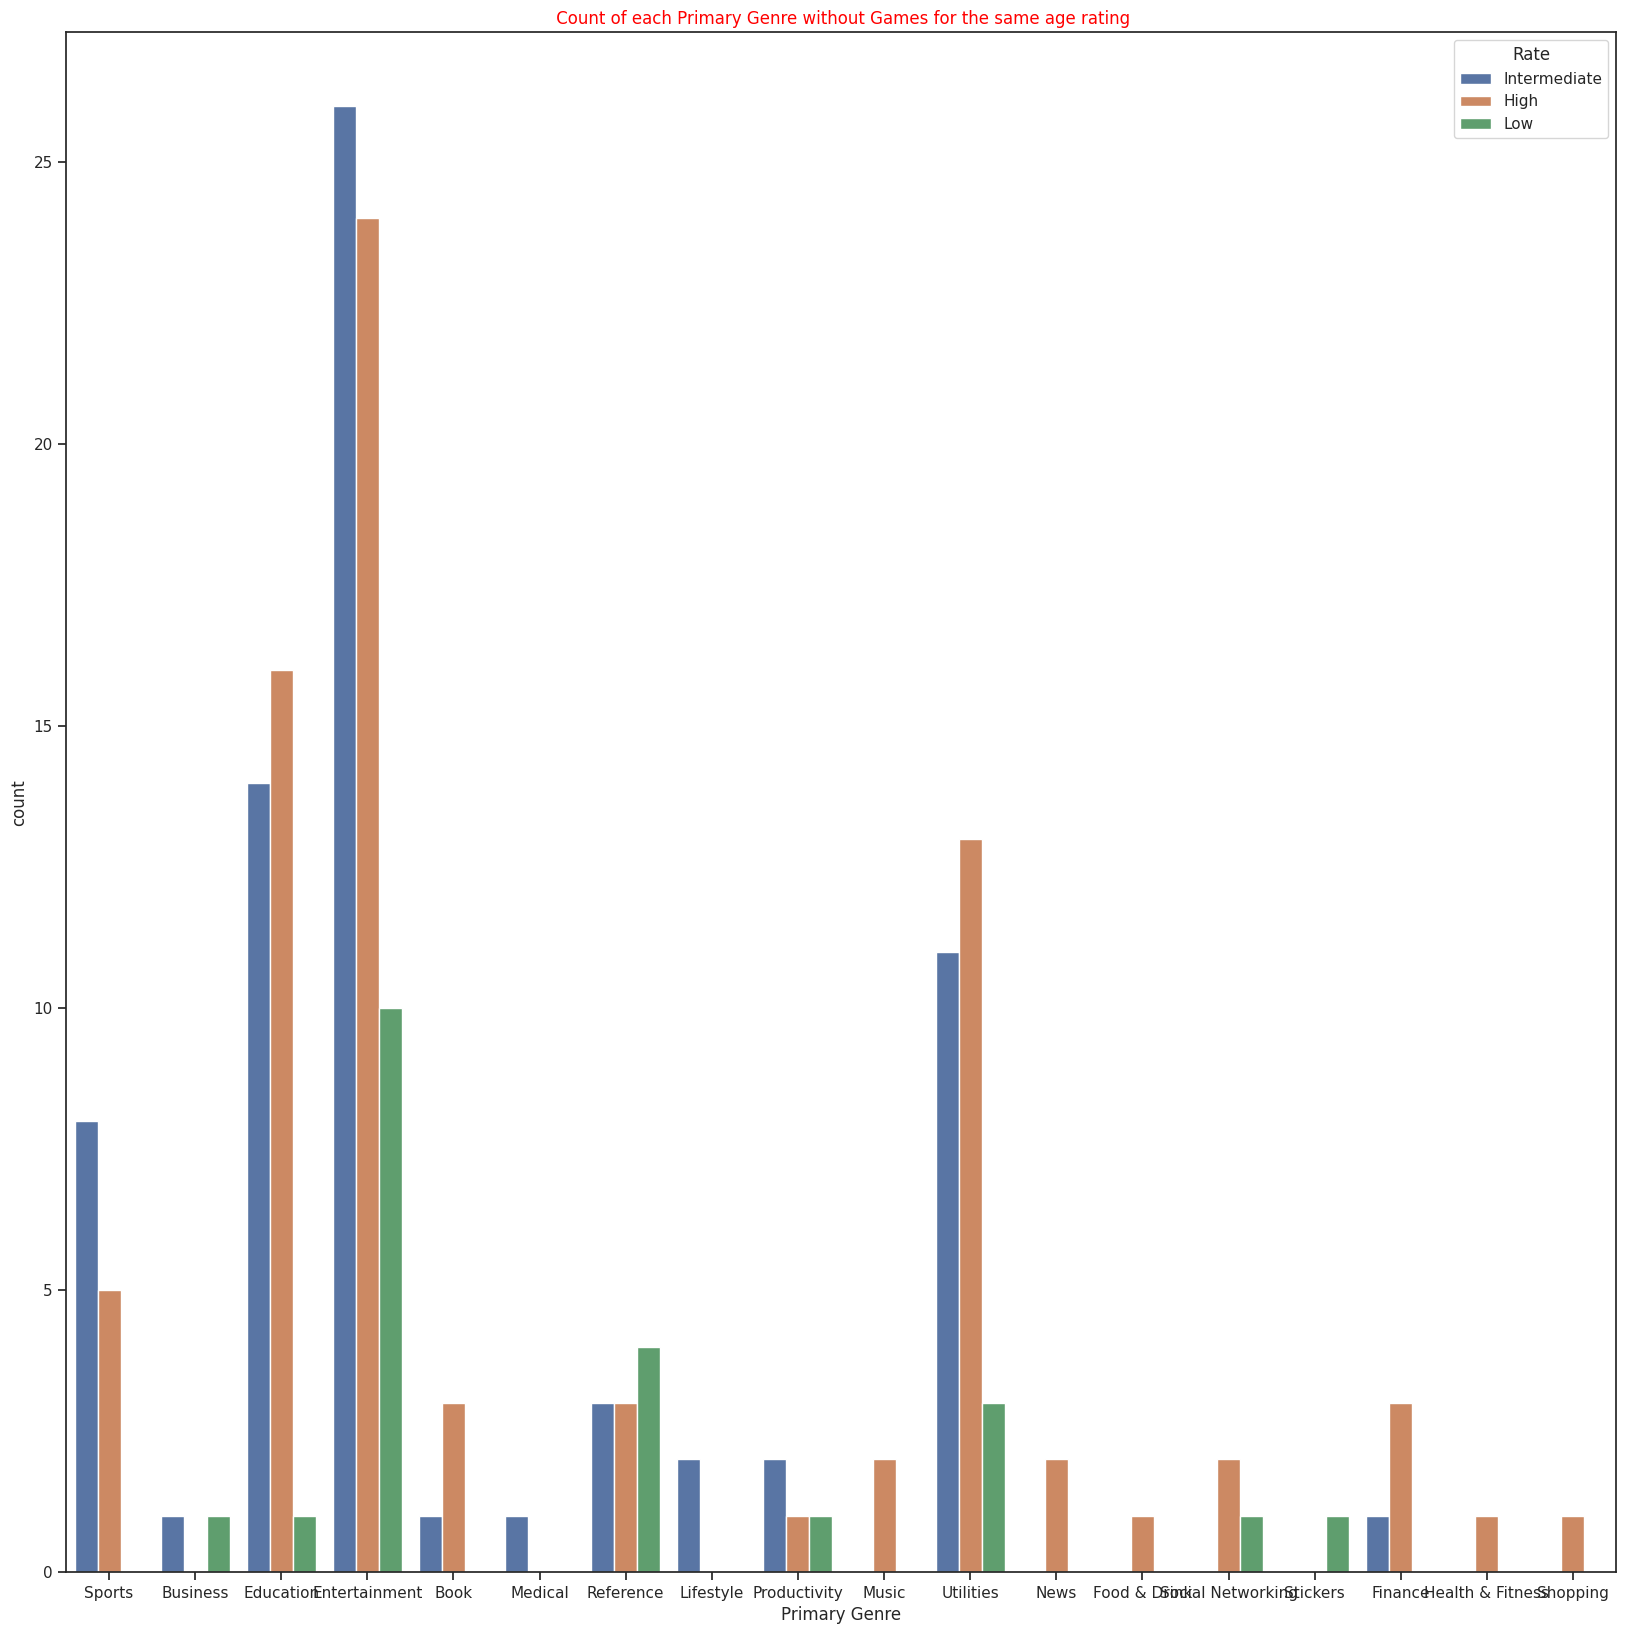

In [207]:
plt.figure(figsize=(20,20))
u=train_data.loc[(train_data["Primary Genre"]!='Games')]

ax = sns.countplot(x ='Primary Genre',hue='Rate', data = u)
plt.title(" Count of each Primary Genre without Games for the same age rating",color="red");

Outliers Detected

In [208]:
len(u)

169

In [209]:
train_data['Original Release Date'] = pd.to_datetime(train_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
train_data['Current Version Release Date'] = pd.to_datetime(train_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')

In [210]:
train_data['Age Rating']=train_data['Age Rating'].str.replace('+', '')
train_data['Age Rating']=train_data['Age Rating'].apply(pd.to_numeric)
train_data['Age Rating']

<ipython-input-210-8f0fa157da96>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_data['Age Rating']=train_data['Age Rating'].str.replace('+', '')


253      4
2592     9
1605     4
4661     4
2        4
        ..
3335     4
1099     4
2514     4
3606    12
2575     4
Name: Age Rating, Length: 4146, dtype: int64

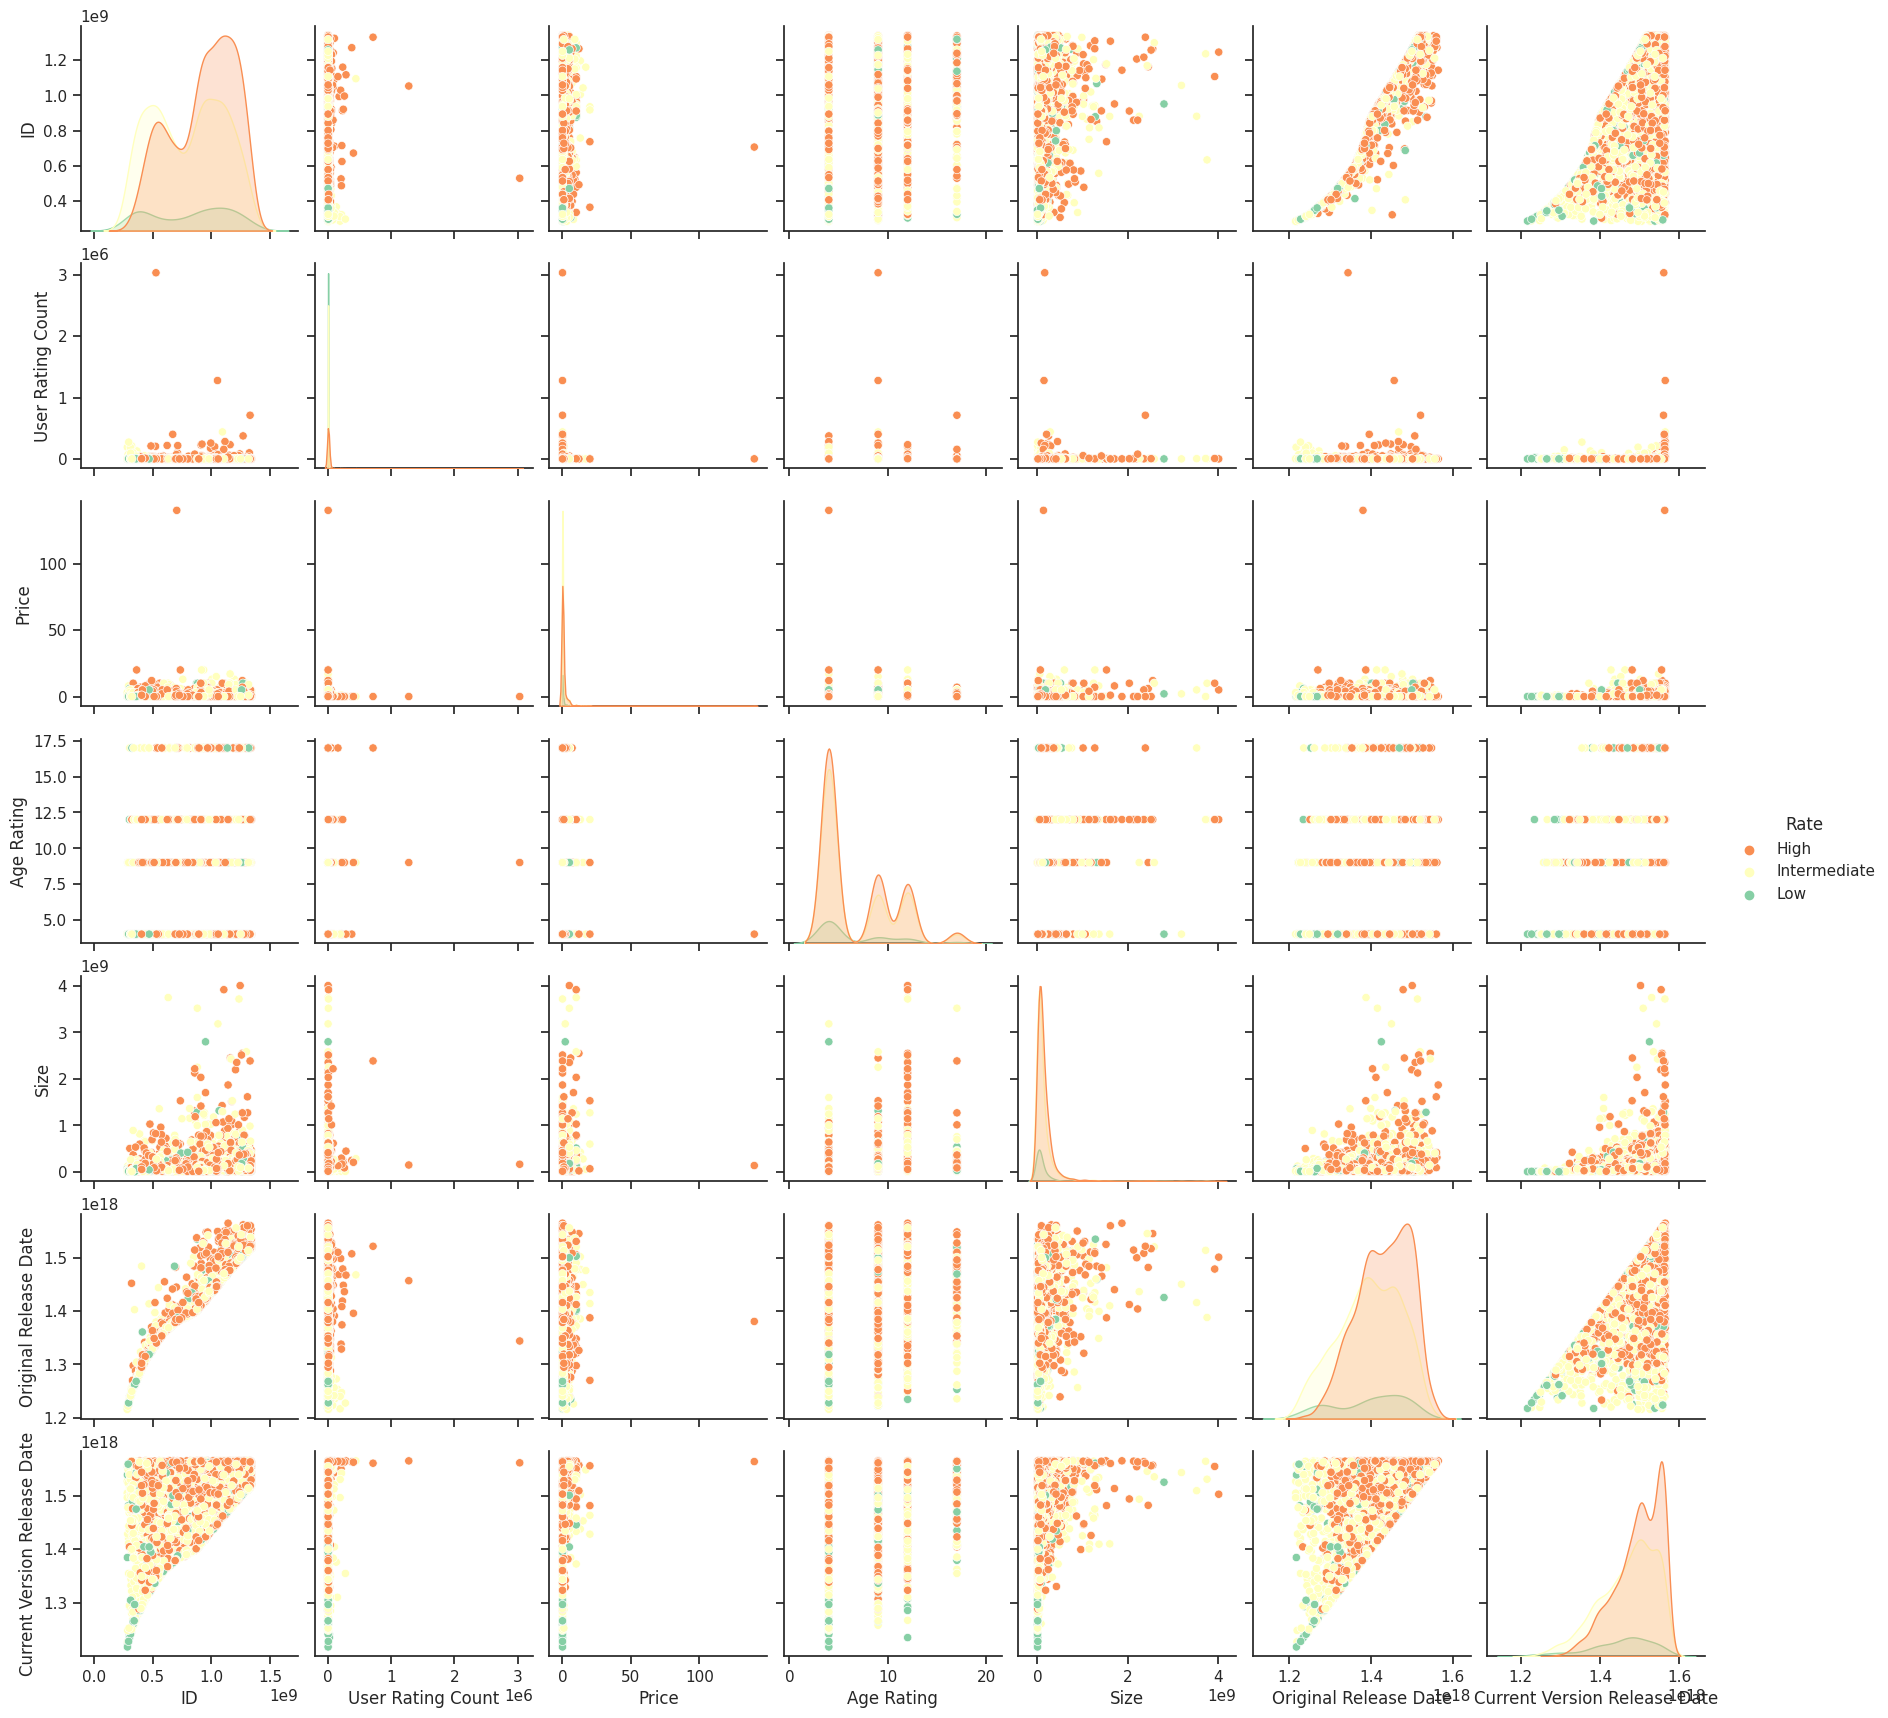

In [211]:
sns.set_theme(style="ticks")
sns.pairplot(train_data, hue="Rate",palette="Spectral")

<ipython-input-212-e2f82e7e8c0e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True)


<Axes: >

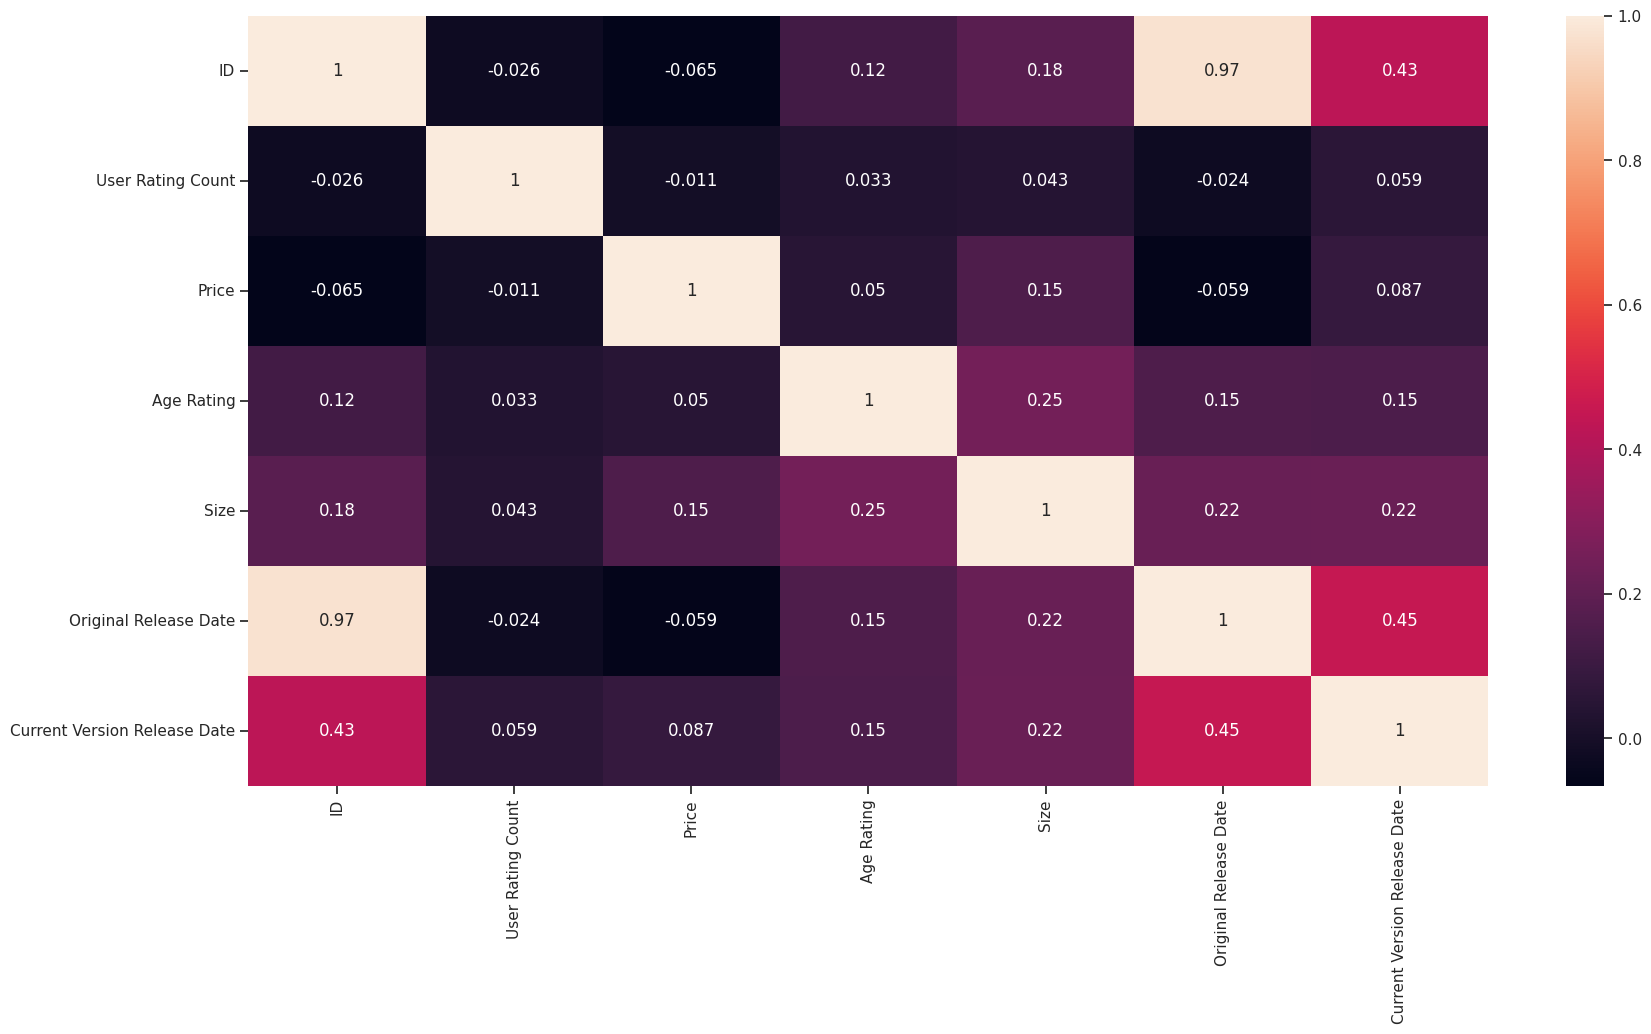

In [212]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),annot=True)

In [213]:
train_data['Developer'].value_counts()

Tapps Tecnologia da Informa\xe7\xe3o Ltda.    78
Detention Apps                                27
HexWar Games Ltd                              22
EASY Inc.                                     19
Qumaron                                       19
                                              ..
Etcetera Edutainment, Inc.                     1
Laylo Inc.                                     1
Jabatoba AB                                    1
Superbrightly Studio LLC                       1
Helen Cheng                                    1
Name: Developer, Length: 2607, dtype: int64

In [214]:
train_data['Name'].is_unique

True

In [215]:
train_data['ID'].is_unique

True

In [216]:
train_data['URL'].is_unique

True

In [217]:
train_data['Icon URL'].is_unique

True

In [218]:
train_data['Rating']=train_data['Rate']
train_data['Primary']=train_data['Primary Genre']


In [219]:
train_data['Rating']

253             High
2592            High
1605            High
4661            High
2               High
            ...     
3335    Intermediate
1099            High
2514            High
3606            High
2575            High
Name: Rating, Length: 4146, dtype: object

In [220]:
train_data['Rating'].unique()

array(['High', 'Intermediate', 'Low'], dtype=object)

we use the chi2_contingency() function from scipy.stats module to compute the chi-square statistic and p-value of the contingency table. Finally, we use these values to calculate the Cramer's V correlation coefficient using the cramers_v() function defined above. The output will be a value between 0 and 1, where 0 indicates no association and 1 indicates a perfect association between the two variables.

In [221]:
# calculate the Cramer's V correlation coefficient
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))



In [222]:
corr_coef = cramers_v(train_data['Rating'], train_data['Primary'])
print("Cramer's V correlation coefficient:", corr_coef)

Cramer's V correlation coefficient: 0.05941171491381983


In [223]:
corr_coef = cramers_v(train_data['Rating'], train_data['Languages'])
print("Cramer's V correlation coefficient:", corr_coef)

Cramer's V correlation coefficient: 0.04419712665731621


In [224]:
corr_coef = cramers_v(train_data['Rating'], train_data['Genres'])
print("Cramer's V correlation coefficient:", corr_coef)

Cramer's V correlation coefficient: 0.10814335849022161


In [225]:
train_data.drop(['URL','Icon URL','Name','ID','Description','Languages','Rating','Primary','User Rating Count','Price','Age Rating','Size'],axis=1,inplace=True)
#data.drop(['URL','Icon URL','Name','ID','Description','Languages'],axis=1,inplace=True)

In [226]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4146 entries, 253 to 2575
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Developer                     4146 non-null   object
 1   Primary Genre                 4146 non-null   object
 2   Genres                        4146 non-null   object
 3   Original Release Date         4146 non-null   int64 
 4   Current Version Release Date  4146 non-null   int64 
 5   Rate                          4146 non-null   object
dtypes: int64(2), object(4)
memory usage: 226.7+ KB


In [227]:
def one_hot_encoding(data,to_be_hot_encoded):
    list_all_unique = []
    # Get New Columns Names.
    for feature in to_be_hot_encoded:
        unique_values = set()
        for i in range(0, len(data)):
            cell = data[feature].iloc[i]  # Equivalent to X[feature][i]
            if not pd.isnull(cell):
                valuesList = cell.split(',')  # ex -> valuesList = [En, Fr, Da, SP]
                for value in valuesList:
                    unique_values.add(value)

        for item in unique_values:
            list_all_unique.append(item)

    returned=update_with_new_columns(data,list_all_unique,to_be_hot_encoded)
    return returned,list_all_unique

In [228]:
def update_with_new_columns(data,list_all_unique,to_be_hot_encoded):
    # Add New Columns.
    updated_data = data
    updated_data = updated_data.reset_index(drop=True)
    for value in list_all_unique:
        new_column_arr = np.zeros(len(data))
        new_column_df = pd.Series(new_column_arr, name=value)
        updated_data = pd.concat([updated_data, new_column_df], axis=1)

    # Remove Old Columns
    for feature in to_be_hot_encoded:
        updated_data.drop(feature, axis=1, inplace=True)

    # Add Ones in the right columns.
    for feature in to_be_hot_encoded:
        for i in range(0, len(data)):
            cell = data[feature].iloc[i]
            if not pd.isnull(cell):
                valuesList = cell.split(',')
                for value in valuesList:
                    if value in updated_data: # Check if 'value' is seen in training operation.     #else: ignore it.
                        value_i = updated_data.columns.get_loc(value)
                        updated_data.iloc[i, value_i] = 1

    # Update.
    return updated_data

In [229]:
traain,list_unquie_train=one_hot_encoding(train_data,['Genres','Developer','Primary Genre'])

In [230]:
# instantiate LabelEncoder
le = LabelEncoder()

# fit and transform the "ٌrate" column
traain['Rate_encoded'] = le.fit_transform(traain['Rate'])
traain['Rate_encoded']
traain['Rate_encoded'].unique()

<ipython-input-230-0dbb93e78a10>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  traain['Rate_encoded'] = le.fit_transform(traain['Rate'])


array([0, 1, 2])

In [231]:
traain.drop(['Rate'],axis=1,inplace=True)

In [232]:
traain.columns

Index(['Original Release Date', 'Current Version Release Date', ' Games',
       ' Photo & Video', ' Health & Fitness', ' Word', ' Travel', ' Card',
       ' Productivity', 'Entertainment',
       ...
       'News', 'Lifestyle', 'Business', 'Finance', 'Games',
       'Social Networking', 'Reference', 'Shopping', 'Music', 'Rate_encoded'],
      dtype='object', length=2723)

In [233]:
from sklearn.ensemble import IsolationForest

model_IF = IsolationForest(contamination=float(0.1))
model_IF.fit(traain)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1)

In [234]:
traain['anomaly'] = model_IF.predict(traain)

In [235]:
data_without_outliers=traain.loc[traain['anomaly']!=-1]

In [236]:
X_train=data_without_outliers.drop(['Rate_encoded','anomaly'],axis=1)
y_train=data_without_outliers['Rate_encoded']

In [237]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [238]:
test_data.drop(['Subtitle','In-app Purchases','URL','Icon URL','Name','ID','Description','Languages','User Rating Count','Price','Age Rating','Size'],axis=1,inplace=True)


In [239]:
test_data['Original Release Date'] = pd.to_datetime(test_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
test_data['Current Version Release Date'] = pd.to_datetime(test_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')

In [240]:
test_data.isnull().sum().sort_values(ascending=False)

Developer                       0
Primary Genre                   0
Genres                          0
Original Release Date           0
Current Version Release Date    0
Rate                            0
dtype: int64

In [241]:
teest=update_with_new_columns(test_data,list_unquie_train,['Genres','Developer','Primary Genre'])

In [242]:
# fit and transform the "ٌrate" column
teest['Rate_encoded'] = le.fit_transform(teest['Rate'])
teest['Rate_encoded']
teest['Rate_encoded'].unique()

<ipython-input-242-1993fa50b60c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  teest['Rate_encoded'] = le.fit_transform(teest['Rate'])


array([0, 1, 2])

In [243]:
teest.drop(['Rate'],axis=1,inplace=True)

In [244]:
X_test=teest.drop(['Rate_encoded'],axis=1)
y_test=teest['Rate_encoded']

In [245]:
X_test_std = sc.transform(X_test)

In [246]:
X_train_std.shape

(3731, 2722)

In [247]:
X_test_std.shape

(1043, 2722)